Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]


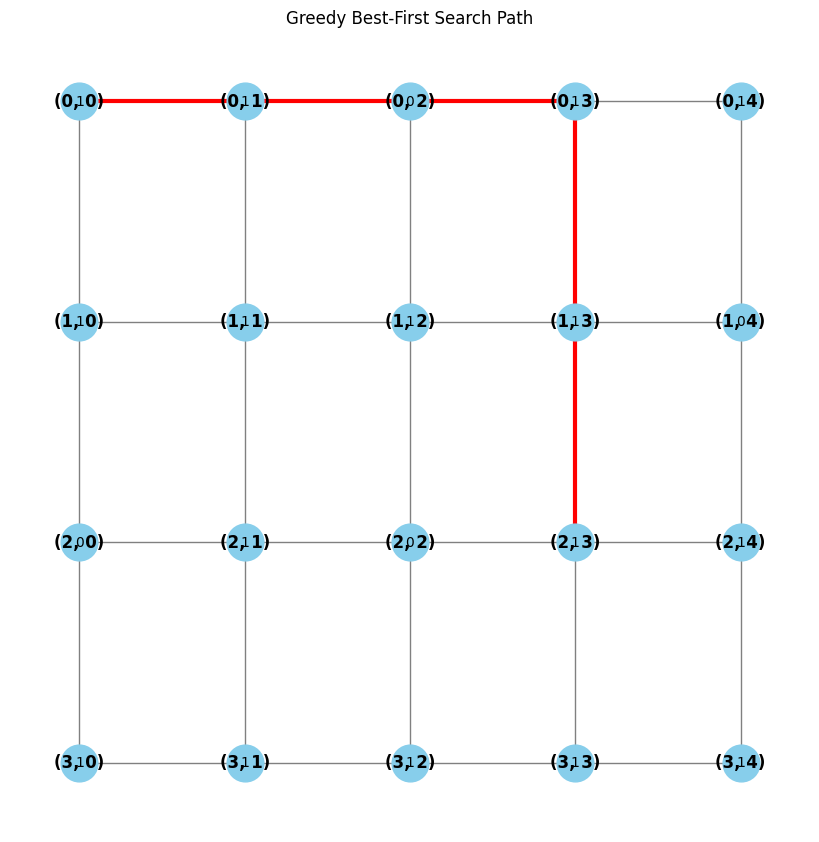

In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Priority Queue class to handle the minimum heap
class PriorityQueue:
    def __init__(self):
        self.heap = []

    def enqueue(self, item, priority):
        heapq.heappush(self.heap, (priority, item))

    def dequeue(self):
        return heapq.heappop(self.heap)[1]

    def isEmpty(self):
        return len(self.heap) == 0

# Reconstruct the path from start to goal
def reconstructPath(path, start, goal):
    current = goal
    full_path = []
    while current != start:
        full_path.append(current)
        current = path[current]
    full_path.append(start)
    return full_path[::-1]  # Reverse the path to start -> goal

# Get valid neighbors of the current node
def neighbors(node, grid):
    x, y = node
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right i.e row=-1 means 1 upper row and row=+1 means 1 lower row
    valid_neighbors = []

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]):  # Stay within bounds
            valid_neighbors.append((nx, ny))

    return valid_neighbors

# Manhattan Distance heuristic
def manhattanDistance(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

# Greedy Best-First Search using Manhattan distance
def GreedyBestFirstSearchManhattan(start, goal, grid):
    pq = PriorityQueue()
    pq.enqueue(start, manhattanDistance(start, goal))  # Start node heuristic value

    path = {start: None}  # Tracks the path to reconstruct the final path
    visited = set()  # Keeps track of visited nodes

    while not pq.isEmpty():
        current = pq.dequeue()

        # If the goal is reached, return the path
        if current == goal:
            return reconstructPath(path, start, goal)

        visited.add(current)

        # Explore the neighbors
        for next_node in neighbors(current, grid):
            if next_node not in visited:
                priority = manhattanDistance(next_node, goal)  # Calculate Manhattan distance
                pq.enqueue(next_node, priority)
                path[next_node] = current

    return "No path found"

# Visualization function using networkx for graph-based visualization
def visualize_graph(grid, path=None):
    G = nx.Graph()  # Create an empty graph

    rows, cols = len(grid), len(grid[0])

    # Add nodes to the graph with their heuristic values (from grid)
    for i in range(rows):
        for j in range(cols):
            G.add_node((i, j), label=grid[i][j])  # Add node with heuristic label

    # Add edges between adjacent nodes (neighbors)
    for i in range(rows):
        for j in range(cols):
            for ni, nj in neighbors((i, j), grid):
                if (i, j) != (ni, nj):  # Avoid adding self loops
                    G.add_edge((i, j), (ni, nj))

    # Prepare node labels (heuristic values)
    labels = {node: f"{G.nodes[node]['label']}" for node in G.nodes}

    # Draw the graph
    pos = {node: (node[1], -node[0]) for node in G.nodes}  # Position nodes for better visualization
    plt.figure(figsize=(8, 8))

    # Draw nodes, edges, and labels
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

    # If a path exists, draw the path in a different color
    if path:
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title("Greedy Best-First Search Path")
    plt.show()

# Test with the given grid for Task 2
grid2 = [
    [1, 1, 0, 1, 1],
    [1, 1, 1, 1, 0],
    [0, 1, 0, 1, 1],
    [1, 1, 1, 1, 1]
]

start2 = (0, 0)  # Starting cell (top-left corner)
goal2 = (2, 3)  # Treasure location

# Perform Greedy Best-First Search to find the path
path2 = GreedyBestFirstSearchManhattan(start2, goal2, grid2)

# Output the path
print("Path found:", path2)

# Visualize the grid as a graph with the path
visualize_graph(grid2, path2)
